<a href="https://colab.research.google.com/github/Jenn-mawia/Titanic-data-classification-and-spam-messages-classification/blob/main/Naive_Baye's_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of spam and non-spam messages**

# Defining the question

**Classify an e-mail as either spam (1) or not spam(0) i.e. unsolicited commercial e-mail.**

# Specifying the question

- Build a Naive Baye's classifier to classify an email as either spam or not. 
- Optimize the model, making sure to document how you've set up your hyperparameters. This includes feature selection, splitting the data into subsets to use in modeling. 


# Defining the metrics for success

>This project will be considered a success if:
- a Naive Baye's model is built to classify an email as spam or not. 
- the model is oprimized to its best performance. 

# Understanding the context

Spam are irrelevant or unsolicited messages sent over the Internet, typically to a large number of users, for the purposes of advertising, phishing, spreading malware etc.

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography etc.

A certain criteria is usually followed to classify an email as either spam or not spam. Non-spam mails are usually collected over time from filed work and personal e-mails and certain words are used as indicators of non-spam. These are useful when constructing a personalized spam filter and are commonly used to classify an email as either spam or not spam. 

# Experimental Design

The following is the order in which I went about this project:

- Data sourcing & understanding
- Checking the data (shape, number of records, datatypes)
- Data cleaning procedures (handling null values,outliers, anomalies)
- Exploratory data analysis
- Implementing the solution
  - Modeling
    - Naive Baye's Classification
    - Model optimization
- Challenging the solution
-Follow up questions

# **Importing Libraries**

In [1]:
# data manipulation/processing
import pandas as pd
# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing/scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

# model performance metrics 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
spambase = pd.read_csv("spambase.data")

# Checking the data

In [3]:
# number of rows and columns in the data
spambase.shape


(4600, 58)

In [4]:
# check the top of the dataset
spambase.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
# check the bottom of the dataset
spambase.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# check the datatypes of the columns
spambase.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

>The data contains a total of 4600 entries and 58 variables. The data is numerical with types float and integer. 

**Attribute information**

The last column denotes whether the e-mail was considered spam (1) or not (0). Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 


- 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

- 6 continuous real [0,100] attributes of type char_freq_CHAR]= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

- 1 continuous real [1,...] attribute of type capital_run_length_average= average length of uninterrupted sequences of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_longest= length of longest uninterrupted sequence of capital letters

- 1 continuous integer [1,...] attribute of type capital_run_length_total= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

- 1 nominal {0,1} class attribute of type spam= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



# Appropriateness of the available data to answer the given question

This data is a collection of spam e-mails that came from a postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

Most attributes in the data indicate whether a particular word or character was frequently occuring in the e-mail, the sum of length of uninterrupted sequences of capital letters, length of longest uninterrupted sequence of capital letters. These features are mostly used to identify whether an email is spam or not. Spam messages are usually classified to having a lot of capital letters with long uninterrupted sequences. 

These features are all important during message classification and will also be useful in our classification problem. Therefore, we can conclude that the data available is appropriate and relevant to the needs of this research question. 

# Data Cleaning

## Missing data

In [7]:
# check for any missing data in all columns
spambase.isnull().sum()

# none was found

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

## Outliers

In [8]:
spambase.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

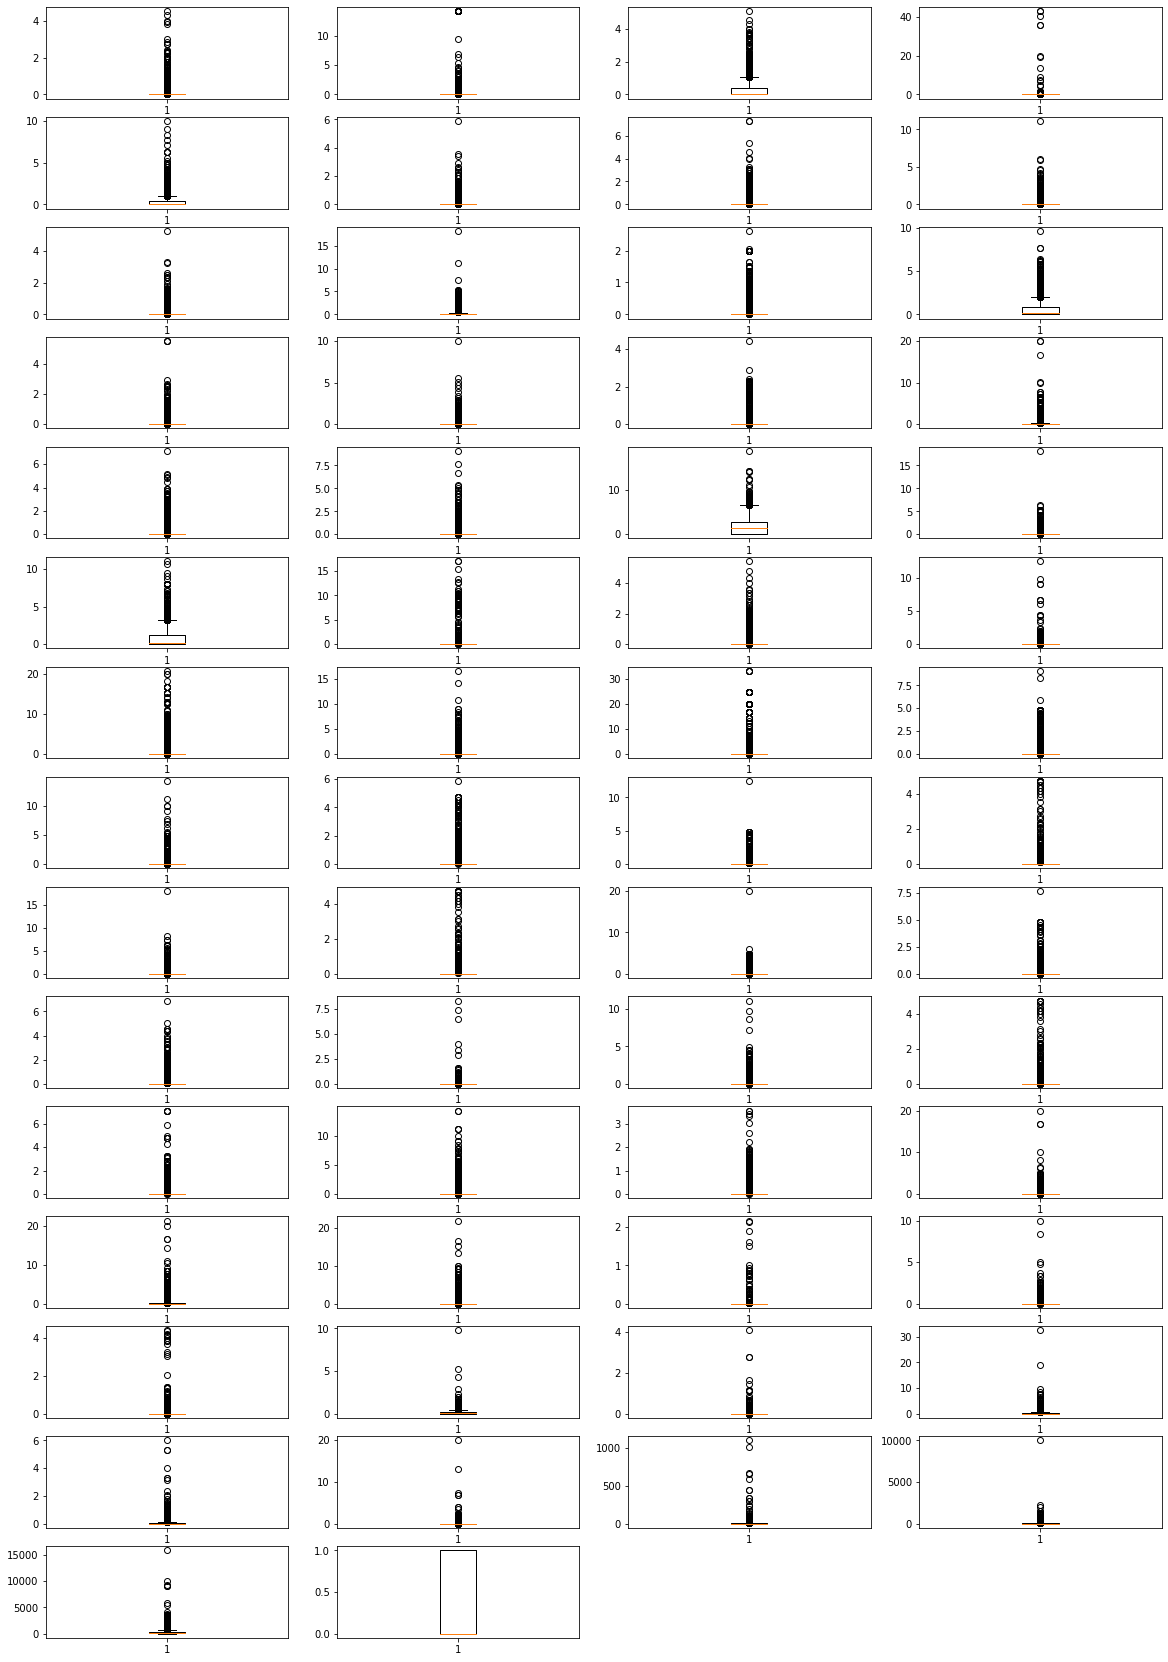

In [9]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'0':1, '0.64':2, '0.64.1':3, '0.1':4, '0.32':5, '0.2':6, '0.3':7, '0.4':8, '0.5':9, '0.6':10,
       '0.7':11, '0.64.2':12, '0.8':13, '0.9':14, '0.10':15, '0.32.1':16, '0.11':17, '1.29':18, '1.93':19,
       '0.12':20, '0.96':21, '0.13':22, '0.14':23, '0.15':24, '0.16':25, '0.17':26, '0.18':27, '0.19':28,
       '0.20':29, '0.21':30, '0.22':31, '0.23':32, '0.24':33, '0.25':34, '0.26':35, '0.27':36, '0.28':37,
       '0.29':38, '0.30':39, '0.31':40, '0.32.2':41, '0.33':42, '0.34':43, '0.35':44, '0.36':45,
       '0.37':46, '0.38':47, '0.39':48, '0.40':49, '0.41':50, '0.42':51, '0.778':52, '0.43':53, '0.44':54,
       '3.756':55, '61':56, '278':57, '1':58}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(15,4,i)
  plt.boxplot(spambase[variable])

plt.show()

In [10]:
# dealing with outliers

print(f"Size of dataset with outliers: {spambase.shape}")
# dealing with outliers
Q1 = spambase.quantile(0.25)
Q3 = spambase.quantile(0.75)
IQR = Q3 - Q1
data = spambase[~((spambase < (Q1 - 1.5 * IQR)) | (spambase > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {data.shape}")

Size of dataset with outliers: (4600, 58)
...................
Size of dataset after removal of outliers: (176, 58)


>From the boxplots above, there are so many outliers in the data and removing them causes our data to shrink by a very huge number resulting in only 176 entries out of the total 4600. This is a huge amount of data loss which we cannot afford to loose. We can look at this effect in the boxplots. 

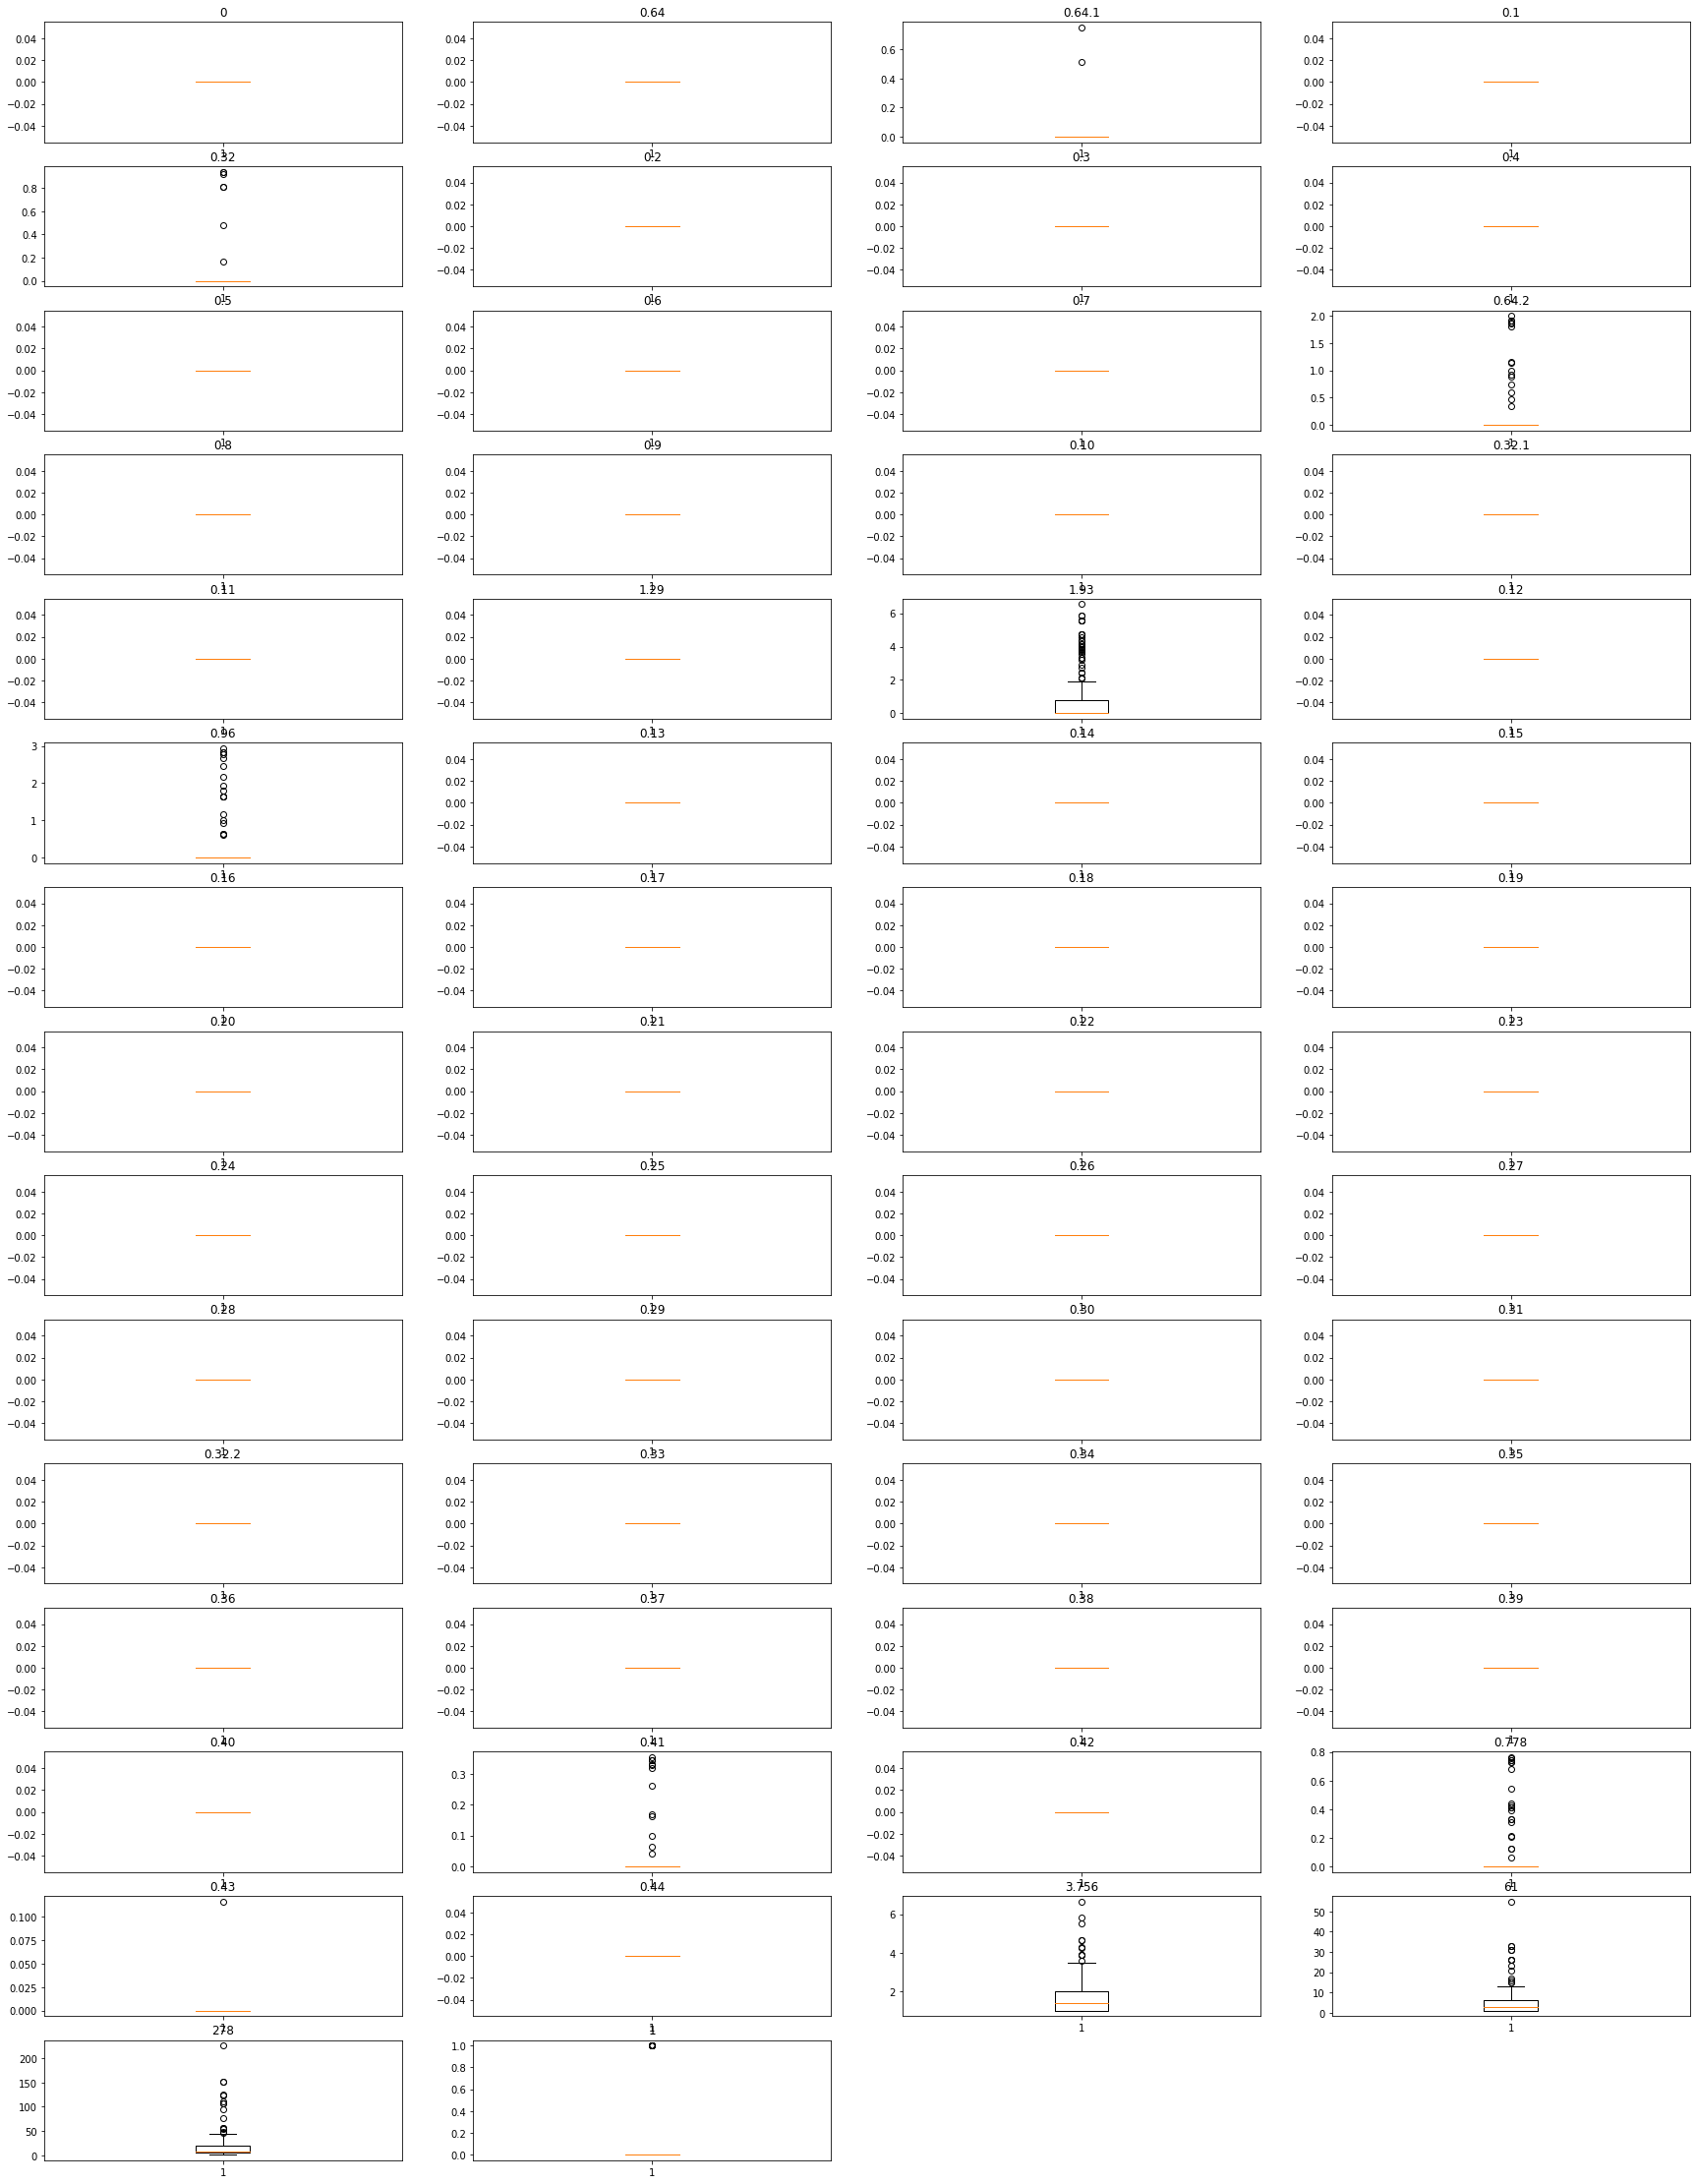

In [11]:
plt.figure(figsize=(30,40))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(15,4,i)
  plt.boxplot(data[variable])
  plt.title(variable)

plt.show()

>Most of the data is wiped off leaving very little information to work with. Since this loss of data is huge, we will revert back to our initial state and work with the data with these outliers as it is even more costly removing them.

## Anomalies

In [12]:
# checking for anomalies
# calculate the interquartile range using pandas
Q1 = spambase['0.64'].quantile(0.25)
Q3 = spambase['0.64'].quantile(0.75)
IQR = Q3 - Q1

# the interquartile range can also be calculated using numpy
iqr1 = np.quantile(spambase['0.64'], .25)
iqr3 = np.quantile(spambase['0.64'], .75)
IQR2 = iqr3 - iqr1

# compare the two values
print(IQR, IQR2)

0.0 0.0


# Exploratory Data Analysis

>we will not perform univariate and bivariate analyses since the data was initially text data and has undergone preprocessing and converted into coded numbers, therefore we won't make informed conclusions about the data from the univariate and bivariate summaries and plots.



# Implementing the solution

# Modeling

>This data does not require a lot of feature engineering processes since preprocessing such as tokenizing, stemming and count-vectorizing has already been done on the data and is ready for modeling.

## Naive Baye's Classification

In [13]:
# Implementing the Solution
# 
# selecting features and labels
X = spambase.drop('1', 1).values #features
y = spambase['1'].values #labels

# splitting the data further into train and test sets(ratio-80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.naive_bayes import MultinomialNB
# modeling
model = MultinomialNB()
model.fit(X_train, y_train)

# predicting
y_pred_spam = model.predict(X_test)

# model performance metrics 
print(classification_report(y_test, y_pred_spam))
print(confusion_matrix(y_test, y_pred_spam))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       569
           1       0.74      0.73      0.74       351

    accuracy                           0.80       920
   macro avg       0.79      0.79      0.79       920
weighted avg       0.80      0.80      0.80       920

[[479  90]
 [ 94 257]]


>The Multinomial Naive Baye's classifier achieves an accuracy of 80%. We can try and improve the model performance by normalizing the data, removing redundant features and applying smoothing techniques and also Increasing the size of test data by Splitting the dataset differently i.e. 70-30, 60-40, and noting the outcomes of the model. 




## **Model Optimization/Improvement**

**Increasing the size of test data. Splitting the datasets differently i.e. 70-30, 60-40, and noting the outcomes of the model.**




In [14]:
# Implementing the Solution
# 
# selecting features and labels
X = spambase.drop('1', 1).values #features
y = spambase['1'].values #labels

# splitting the data further into train and test sets(ratio-60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)


# modeling
model = MultinomialNB()
model.fit(X_train, y_train)

# predicting
y_pred_spam = model.predict(X_test)

# model performance metrics 
print(classification_report(y_test, y_pred_spam))
print(confusion_matrix(y_test, y_pred_spam))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1136
           1       0.73      0.77      0.75       704

    accuracy                           0.80      1840
   macro avg       0.79      0.80      0.79      1840
weighted avg       0.81      0.80      0.80      1840

[[935 201]
 [162 542]]


In [15]:
# Implementing the Solution
# 
# selecting features and labels
X = spambase.drop('1', 1).values #features
y = spambase['1'].values #labels

# splitting the data further into train and test sets(ratio-70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


# modeling
model = MultinomialNB()
model.fit(X_train, y_train)

# predicting
y_pred_spam = model.predict(X_test)

# model performance metrics 
print(classification_report(y_test, y_pred_spam))
print(confusion_matrix(y_test, y_pred_spam))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       865
           1       0.73      0.75      0.74       515

    accuracy                           0.80      1380
   macro avg       0.79      0.79      0.79      1380
weighted avg       0.80      0.80      0.80      1380

[[720 145]
 [130 385]]


>Splitting the data differently does not improve the model performance. So we can just use any splitting criteria since the outcome is same.

**Normalizing the data**

>We normalize our data so that it all features/variables end up on the same scale. We can do this using the MinMaxScaler, StandardScaler and RobustScaler from the sklearn preprocessing library. 

In [16]:
# Implementing the Solution
# 
# selecting features and labels
X = spambase.drop('1', 1).values #features
y = spambase['1'].values #labels

# feature scaling
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

# splitting the data further into train and test sets(ratio-80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# modeling
model = MultinomialNB()
model.fit(X_train, y_train)

# predicting
y_pred_spam = model.predict(X_test)

# model performance metrics 
print(classification_report(y_test, y_pred_spam))
print(confusion_matrix(y_test, y_pred_spam))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       569
           1       0.91      0.76      0.83       351

    accuracy                           0.88       920
   macro avg       0.89      0.86      0.87       920
weighted avg       0.88      0.88      0.88       920

[[543  26]
 [ 84 267]]


>Scaling the features using the MinMaxScaler improves the model performance greatly. 

**Removing redundant features**

>We can remove redundant/correlated features as part of feature selection. We do this because the performance of the Naive Bayes Classifier can degrade if the dataset contains highly correlated variables. 

We can check for this using the VIF scores of each column. VIF scores are calculated from the inverse of the correlations in the data. VIF scores above 5 and 10 show that there exists multicolinearity and such columns need to be removed. 

In [23]:
# drop the target column
df = spambase.drop("1", 1)

In [24]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)


calc_vif(df)

,variables,VIF
0,0,1.264179
1,0.64,1.017945
2,0.64.1,1.413308
3,0.1,1.007463
4,0.32,1.329474
5,0.2,1.218456
6,0.3,1.207621
7,0.4,1.163682
8,0.5,1.326418
9,0.6,1.231720


In [25]:
# remove the features with high VIF values
df = df.drop(['0.23', '0.25'], axis=1)
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [26]:
# call the function once more to see the changes in the VIF
calc_vif(df)

,variables,VIF
0,0,1.260356
1,0.64,1.016719
2,0.64.1,1.411842
3,0.1,1.007455
4,0.32,1.328763
5,0.2,1.218138
6,0.3,1.207449
7,0.4,1.163118
8,0.5,1.325860
9,0.6,1.231071


>the data is now okay without redundant features. We can then use these features to build our model and check its performance

In [27]:
# Implementing the Solution
# 
# selecting features and labels
X = df.values #features
y = spambase['1'].values #labels

# feature scaling
X = MinMaxScaler().fit_transform(X)

# splitting the data further into train and test sets(ratio-80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# modeling
model = MultinomialNB()
model.fit(X_train, y_train)

# predicting
y_pred_spam = model.predict(X_test)

# model performance metrics 
print(classification_report(y_test, y_pred_spam))
print(confusion_matrix(y_test, y_pred_spam))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90       569
           1       0.91      0.73      0.81       351

    accuracy                           0.87       920
   macro avg       0.88      0.84      0.86       920
weighted avg       0.87      0.87      0.87       920

[[544  25]
 [ 95 256]]


>Performing feature scaling and dropping the redundant features improves the model from the first model built which was at 80% accuracy. However, this new value of 87% accuracy achieved by this new model is lower than that of the modeling using all features scaled with the MinMaxScaler at 88%. This is due to redudancy of the features which have the same information being passed into the model. This defies Naive Baye's theorem of independence of features; Naive Baye's treats each feature as completely independent of one another. 

This is the best accuracy score achieved so far, after scaling and removing correlated features and the model is proposed to be put into use.  

# Challenging the solution

Our best model is achieved using the Multinomial Naive Baye's Classifier, scaling features with the MinMaxScaler and removing redundant features. 

Although, the accuracy is not very high, the model can still classify a message as spam or non-spam with minimal errors as observed in the correlation matrix. 

These results should however not hold the day. We can perform the same classification other modeling techniques such as Multi-variate Bernoulli Naive Bayes Classification and the SVM classification while checking the model performance against the Multinomial Naive Bayes model. 

The final model will be one that achieves maximum accuracy while overcoming overfitting, and few misclassification errors in the confusion matrix.

Generally, this will be an iterative process that will be done until the best model is achieved.

# Follow up questions

## a). Did we have the right data?

>Yes, the data available was appropriate for the research question that was stated. 

## b). Do we need other data to answer our question?

>It would be desirable if more information was added to the data. This includes more indicators of non-spam messages. Only two words(george, 650) minimized and limited us during the preprocessing stage and during classification of a non-spam message. More indicators of non-spam messages help when constructing a personalized spam filter.

## c). Did we have the right question?

>The research question was specific and appropriate and in line with our needs and the data available